In [1]:
%pip install nltk
%pip install openpyxl

%pip install textstat


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re



In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lahiruwijayapala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lahiruwijayapala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import pandas as pd

In [18]:
# Program to read the entire file (absolute path) using read() function
caseNo='Case1'
file_path = '/Users/lahiruwijayapala/Desktop/Research Data/'+caseNo+'.txt'


In [19]:
### Parse to a list of Dicts
def parse_prompt_response(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    pairs = content.split('---END_OF_PAIR---')
    data = []
    
    for pair in pairs:
        if '---PROMPT_START---' in pair and '---RESPONSE_START---' in pair:
            prompt, response = pair.split('---RESPONSE_START---', 1)
            prompt = prompt.split('---PROMPT_START---', 1)[-1].strip()
            response = response.strip()
            data.append({'prompt': prompt, 'response': response})
    
    return data

pairs = parse_prompt_response(file_path)



In [20]:
df=pd.DataFrame(pairs)
df.head()

,prompt,response
0,I am planning to visit to Rotorua new Zealand,Rotorua is a fantastic destination with a lot ...
1,"What are the main attractions in Rotorua, and ...","Rotorua has several standout attractions, each..."
2,What are the best natural places to visit in R...,Rotorua is brimming with natural wonders beyon...
3,What are some of the top cultural experiences ...,"Rotorua is rich in Maori culture and heritage,..."
4,What outdoor adventure activities are popular ...,Rotorua is a fantastic destination for outdoor...


In [21]:
#all_prompts = "\n".join(df['prompt'].tolist())
all_prompts = "\n".join(f'"{prompt}"' for prompt in df['prompt'])

print(all_prompts)

"I am planning to visit to Rotorua new Zealand"
"What are the main attractions in Rotorua, and what makes each one unique?"
"What are the best natural places to visit in Rotorua?"
"What are some of the top cultural experiences or Maori heritage sites in Rotorua?"
"What outdoor adventure activities are popular in Rotorua?"
"My budget is 2000NZD for 2 adult and 3 kids what are the options for night stay?"
"What accommodations are available in Rotorua, and what are the options for different budgets?"
"I am planning to you by car"
"What should visitors know about the local Maori culture and traditions before visiting Rotorua?"
"Are there any unique shopping experiences or local crafts that visitors should explore in Rotorua?"
"What safety tips or precautions should visitors take while exploring Rotorua’s"


In [5]:
data=pd.read_excel('/Users/lahiruwijayapala/Desktop/Research/Book1.xlsx', sheet_name='Sheet2')

In [6]:
data.head()

,Participant 1,Unnamed: 1,Participant 3,Participant 4,Participant 5,Participant 6,Participant 7,Participant 8,Participant 9,Participant 10
0,I am planning to visit to Rotorua new Zealand,NaN,Need to plan a trip to Rotorua from Acualkand,I need assistance on planning a trip to Rotoru...,I'm planning a 4-day trip to Seoul. Can you su...,i live in Auckland city. need to go to a trip ...,"make a plan to go to rotorua from Sandrigham, ...",Help me plan a three day trip to Rotorua. I li...,"I am planning to visit Rotorua New Zealand, my...",Hi can you please plan me a trip to rotorua NZ...
1,"What are the main attractions in Rotorua, and ...",NaN,For a three days trip from Auckland to Rotorua...,I need assistance on planning a trip to Rotoru...,I am planning a 3 day trip to Rotorua NZ with ...,don't we have places to visit on the way to Ro...,can I visit Hunua falls as well,Did you account for fuel costs?,What are the activities I can do,Hmm not bad but i want to keep this trip under...
2,What are the best natural places to visit in R...,NaN,"Within the same budget, what are the possible ...",I understand that you have provided a plan for...,NaN,i am planning my visit in September second wee...,how close hunua falls to Rototua,"Great! Rotorua has a diverse food scene, rangi...",How many days to explore Rotorua,whats the best and cost effective of way to ge...
3,What are some of the top cultural experiences ...,NaN,Does the above budget include travel insurance...,NaN,NaN,suggest me a different route to come back to a...,then dont include it into the itinerary are th...,For the first day I plan to rest. After that I...,What is the best way to travel Rotorua and cost,I see what about the cost for accommodation an...
4,What outdoor adventure activities are popular ...,NaN,How the climate would impact the planned durat...,NaN,NaN,no. i need to use the previous route to Rotoru...,how about if we hire small van for the transport,Is there any good hikes?,Is the air quality good in Rotorua,my budget is tight and so can you give me a de...


In [7]:
print(data['Participant 1'].dropna())

0         I am planning to visit to Rotorua new Zealand
1     What are the main attractions in Rotorua, and ...
2     What are the best natural places to visit in R...
3     What are some of the top cultural experiences ...
4     What outdoor adventure activities are popular ...
5     My budget is 2000NZD for 2 adult and 3 kids wh...
6     What accommodations are available in Rotorua, ...
7                           I am planning to you by car
8     What should visitors know about the local Maor...
9     Are there any unique shopping experiences or l...
10    What safety tips or precautions should visitor...
Name: Participant 1, dtype: object


In [22]:
d = data['Participant 1'].dropna().apply(preprocess)

#d = df['response'].apply(preprocess)

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(d)

In [28]:
df['cleaned_responses'] = df['response'].apply(preprocess)

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_responses'])

In [29]:
df.head()

,prompt,response,cleaned_responses
0,I am planning to visit to Rotorua new Zealand,Rotorua is a fantastic destination with a lot ...,rotorua fantastic destination lot offer known ...
1,"What are the main attractions in Rotorua, and ...","Rotorua has several standout attractions, each...",rotorua several standout attraction offering u...
2,What are the best natural places to visit in R...,Rotorua is brimming with natural wonders beyon...,rotorua brimming natural wonder beyond famous ...
3,What are some of the top cultural experiences ...,"Rotorua is rich in Maori culture and heritage,...",rotorua rich maori culture heritage offering s...
4,What outdoor adventure activities are popular ...,Rotorua is a fantastic destination for outdoor...,rotorua fantastic destination outdoor adventur...


In [30]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA with the number of topics you want to discover
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # Specify the number of topics
lda.fit(dtm)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Topic {index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:
['check', 'aware', 'condition', 'art', 'safety', 'traditional', 'respect', 'local', 'cultural', 'maori']
Topic 1:
['option', 'lake', 'night', 'geothermal', 'nzd', 'offer', 'whats', 'maori', 'unique', 'experience']


## dominant_topic

In [27]:
# Get the distribution of topics in each document (prompt)
topic_distribution = lda.transform(dtm)

# Show the dominant topic for each prompt
data['dominant_topic'] = topic_distribution.argmax(axis=1)


ValueError: Length of values (11) does not match length of index (16)

In [15]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


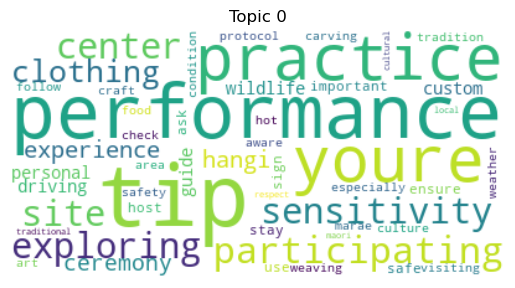

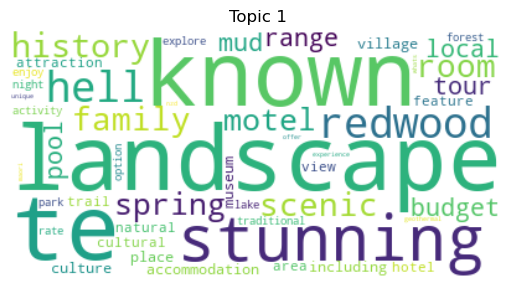

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for index, topic in enumerate(lda.components_):
    wc = WordCloud(background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {index}")
    plt.show()


In [ ]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Prepare the LDA model
lda_model = LatentDirichletAllocation(n_components=1, random_state=42)
lda_model.fit(dtm)

# Convert the document-term matrix into the required format
lda_data = {'topic_term_dists': lda_model.components_ / lda_model.components_.sum(axis=1)[:, None],
            'doc_topic_dists': lda_model.transform(dtm),
            'doc_lengths': [len(doc.split()) for doc in data['cleaned_responses']],
            'vocab': vectorizer.get_feature_names_out(),
            'term_frequency': dtm.toarray().sum(axis=0)}

# Create the visualization
pyLDAvis_data = pyLDAvis.prepare(**lda_data)
#pyLDAvis.show(pyLDAvis_data)



KeyError: 'cleaned_responses'

### corrected for 'd'

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Prepare the LDA model
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_model.fit(dtm)

# Convert the document-term matrix into the required format
lda_data = {'topic_term_dists': lda_model.components_ / lda_model.components_.sum(axis=1)[:, None],
            'doc_topic_dists': lda_model.transform(dtm),
            'doc_lengths': [len(doc.split()) for doc in d],
            'vocab': vectorizer.get_feature_names_out(),
            'term_frequency': dtm.toarray().sum(axis=0)}

# Create the visualization
pyLDAvis_data = pyLDAvis.prepare(**lda_data)
#pyLDAvis.show(pyLDAvis_data)



In [ ]:
import pyLDAvis
import pyLDAvis.lda_model

# Create the visualization
pyLDAvis_data = pyLDAvis.prepare(**lda_data)

# Save the visualization to an HTML file
pyLDAvis.save_html(pyLDAvis_data, 'lda_visualization.html')


# word count.

In [ ]:

def word_count(text):
    lex = LexicalRichness(text)
    return lex.words

data['word_count'] = data['Prompt'].apply(word_count)


### unique word count.

In [ ]:

def unique_word_count(text):
    lex = LexicalRichness(text)
    return lex.terms

data['unique_word_count'] = data['Prompt'].apply(unique_word_count)


###  type-token ratio (TTR) of text.

In [ ]:

def type_token_ratio(text):
    lex = LexicalRichness(text)
    return lex.ttr

data['type_token_ratio'] = data['Prompt'].apply(type_token_ratio)

###  root type-token ratio (RTTR) of text.

In [ ]:
def root_type_token_ratio(text):
    lex = LexicalRichness(text)
    return lex.rttr

data['root_type_token_ratio'] = data['Prompt'].apply(root_type_token_ratio)

###  corrected type-token ratio (CTTR) of text.

In [ ]:
def corrected_type_token_ratio(text):
    lex = LexicalRichness(text)
    return lex.cttr

data['corrected_type_token_ratio'] = data['Prompt'].apply(corrected_type_token_ratio)


In [ ]:
data.head()

,Case Number,Prompt Number,Prompt,mtld,words,word_count,unique_word_count,type_token_ratio,root_type_token_ratio,corrected_type_token_ratio
0,3.0,1,Need to plan a trip to Rotorua from Acualkand,22.6800,9,9,8,0.888889,2.666667,1.885618
1,NaN,2,For a three days trip from Auckland to Rotorua...,16.0000,16,16,16,1.000000,4.000000,2.828427
2,4.0,1,I need assistance on planning a trip to Rotoru...,67.2700,62,62,46,0.741935,5.842006,4.130922
3,NaN,2,I need assistance on planning a trip to Rotoru...,78.5575,67,67,51,0.761194,6.230642,4.405729
4,NaN,3,I understand that you have provided a plan for...,40.3200,24,24,20,0.833333,4.082483,2.886751


# readability-metrics

In [ ]:
%pip install py-readability-metrics

  Obtaining dependency information for py-readability-metrics from https://files.pythonhosted.org/packages/e2/ef/c8724b3b13516ea5437ba32f128254012f96c4b6d2712b1befa3519bfc87/py_readability_metrics-1.4.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Program to read the entire file (absolute path) using read() function
file = open("/Users/lahiruwijayapala/Desktop/Research Data/Case10.txt", "r")
content = file.read()
print(content)
file.close()

---PROMPT_START---

Hi can you please plan me a trip to rotorua NZ foa three days trip, ideally in summer

---RESPONSE_START---

Absolutely! Rotorua is a fantastic destination with its geothermal wonders, Maori culture, and stunning landscapes. Here’s a three-day summer itinerary to make the most of your trip:

Day 1: Geothermal Wonders and Maori Culture
Morning:

Wai-O-Tapu Thermal Wonderland

Activity: Explore the colorful geothermal features including the Champagne Pool, the Artist's Palette, and the Lady Knox Geyser.
Duration: 2-3 hours
Tip: Arrive early to avoid crowds and see the geyser eruption.
Lunch:

Options: Enjoy a meal at the on-site café or pack a picnic.
Afternoon:

Te Puia
Activity: Discover the geothermal landscape, visit the Pohutu Geyser, and explore Maori arts and crafts at the New Zealand Maori Arts and Crafts Institute.
Duration: 2-3 hours
Tip: Join a guided tour to learn more about the cultural aspects.
Evening:

Dinner:
Options: Try a traditional hangi feast at 

In [ ]:
def parse_prompt_response(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    pairs = content.split('---END_OF_PAIR---')
    data = []
    
    for pair in pairs:
        if '---PROMPT_START---' in pair and '---RESPONSE_START---' in pair:
            prompt, response = pair.split('---RESPONSE_START---', 1)
            prompt = prompt.split('---PROMPT_START---', 1)[-1].strip()
            response = response.strip()
            data.append({'prompt': prompt, 'response': response})
    
    return data

# Example usage
file_path = '/Users/lahiruwijayapala/Desktop/Research Data/Case10.txt'
pairs = parse_prompt_response(file_path)
for idx, pair in enumerate(pairs):
    print(f"Prompt {idx + 1}:\n{pair['prompt']}\n")
    print(f"Response {idx + 1}:\n{pair['response']}\n")


Prompt 1:
Hi can you please plan me a trip to rotorua NZ foa three days trip, ideally in summer

Response 1:
Absolutely! Rotorua is a fantastic destination with its geothermal wonders, Maori culture, and stunning landscapes. Here’s a three-day summer itinerary to make the most of your trip:

Day 1: Geothermal Wonders and Maori Culture
Morning:

Wai-O-Tapu Thermal Wonderland

Activity: Explore the colorful geothermal features including the Champagne Pool, the Artist's Palette, and the Lady Knox Geyser.
Duration: 2-3 hours
Tip: Arrive early to avoid crowds and see the geyser eruption.
Lunch:

Options: Enjoy a meal at the on-site café or pack a picnic.
Afternoon:

Te Puia
Activity: Discover the geothermal landscape, visit the Pohutu Geyser, and explore Maori arts and crafts at the New Zealand Maori Arts and Crafts Institute.
Duration: 2-3 hours
Tip: Join a guided tour to learn more about the cultural aspects.
Evening:

Dinner:
Options: Try a traditional hangi feast at a cultural experienc

In [ ]:
pairs[0]

{'prompt': 'Hi can you please plan me a trip to rotorua NZ foa three days trip, ideally in summer',
 'response': "Absolutely! Rotorua is a fantastic destination with its geothermal wonders, Maori culture, and stunning landscapes. Here’s a three-day summer itinerary to make the most of your trip:\n\nDay 1: Geothermal Wonders and Maori Culture\nMorning:\n\nWai-O-Tapu Thermal Wonderland\n\nActivity: Explore the colorful geothermal features including the Champagne Pool, the Artist's Palette, and the Lady Knox Geyser.\nDuration: 2-3 hours\nTip: Arrive early to avoid crowds and see the geyser eruption.\nLunch:\n\nOptions: Enjoy a meal at the on-site café or pack a picnic.\nAfternoon:\n\nTe Puia\nActivity: Discover the geothermal landscape, visit the Pohutu Geyser, and explore Maori arts and crafts at the New Zealand Maori Arts and Crafts Institute.\nDuration: 2-3 hours\nTip: Join a guided tour to learn more about the cultural aspects.\nEvening:\n\nDinner:\nOptions: Try a traditional hangi fe

In [ ]:
import pandas as pd
import textstat


def calculate_flesch_reading_ease(response):
    return textstat.flesch_reading_ease(response)

def create_dataframe(file_path):
    pairs = parse_prompt_response(file_path)
    
    scores = []
    for pair in pairs:
        score = calculate_flesch_reading_ease(pair['response'])
        scores.append({'prompt': pair['prompt'], 'response': pair['response'], 'flesch_reading_ease': score})
    
    df = pd.DataFrame(scores)
    return df

# Example usage
df = create_dataframe(file_path)
print(df)

                                               prompt  \
0   Hi can you please plan me a trip to rotorua NZ...   
1   Hmm not bad but i want to keep this trip under...   
2   whats the best and cost effective of way to ge...   
3   I see what about the cost for accommodation an...   
4   my budget is tight and so can you give me a de...   
5   sweet, give me a daily itinerary with cost for...   
6   Hmm this means I can defiantly splurge a littl...   
7   can you find me some mid-range accommodation i...   
8   okay what about the activities, I want to do s...   
9   are there any free activities or attractions i...   
10  thank you, do you have any tips or advice for ...   
11  what season is best to travel rotorua and whic...   
12  Thank you for this, can you give me a final li...   
13  how would my budget change if I were to take m...   
14  lets say I wanna hire a campervan, is it a goo...   
15  If I were to cook my own food, where can I sho...   

                              

# flesch_kincaid_grade

In [ ]:
def calculate_flesch_kincaid_grade(response):
    return textstat.flesch_kincaid_grade(response)

def create_dataframe(file_path,func,column_name):
    pairs = parse_prompt_response(file_path)
    
    scores = []
    for pair in pairs:
        score = func(pair['response'])
        scores.append({'prompt': pair['prompt'], 'response': pair['response'], column_name: score})
    
    df = pd.DataFrame(scores)
    return df

# Example usage
df = create_dataframe(file_path,calculate_flesch_kincaid_grade,'flesch_kincaid_grade')
print(df.head())

                                              prompt  \
0      I am planning to visit to Rotorua new Zealand   
1  What are the main attractions in Rotorua, and ...   
2  What are the best natural places to visit in R...   
3  What are some of the top cultural experiences ...   
4  What outdoor adventure activities are popular ...   

                                            response  flesch_kincaid_grade  
0  Rotorua is a fantastic destination with a lot ...                   9.2  
1  Rotorua has several standout attractions, each...                  10.6  
2  Rotorua is brimming with natural wonders beyon...                   9.5  
3  Rotorua is rich in Maori culture and heritage,...                  12.1  
4  Rotorua is a fantastic destination for outdoor...                  12.0  


# gunning_fog

In [ ]:

def calculate_gunning_fog(response):
    return textstat.gunning_fog(response)

# Example usage
df = create_dataframe(file_path,calculate_gunning_fog,'gunning_fog_score')
print(df.head())

                                              prompt  \
0      I am planning to visit to Rotorua new Zealand   
1  What are the main attractions in Rotorua, and ...   
2  What are the best natural places to visit in R...   
3  What are some of the top cultural experiences ...   
4  What outdoor adventure activities are popular ...   

                                            response  gunning_fog_score  
0  Rotorua is a fantastic destination with a lot ...              11.91  
1  Rotorua has several standout attractions, each...              10.79  
2  Rotorua is brimming with natural wonders beyon...               9.79  
3  Rotorua is rich in Maori culture and heritage,...              11.37  
4  Rotorua is a fantastic destination for outdoor...              11.22  


# smog_index

In [ ]:

def calculate_smog_index(response):
    return textstat.smog_index(response)

# Example usage
df = create_dataframe(file_path,calculate_smog_index,'smog_index')
print(df.head())

                                              prompt  \
0      I am planning to visit to Rotorua new Zealand   
1  What are the main attractions in Rotorua, and ...   
2  What are the best natural places to visit in R...   
3  What are some of the top cultural experiences ...   
4  What outdoor adventure activities are popular ...   

                                            response  smog_index  
0  Rotorua is a fantastic destination with a lot ...        12.7  
1  Rotorua has several standout attractions, each...        13.3  
2  Rotorua is brimming with natural wonders beyon...        12.5  
3  Rotorua is rich in Maori culture and heritage,...        14.3  
4  Rotorua is a fantastic destination for outdoor...        13.3  


# automated_readability_index

In [ ]:

def calculate_automated_readability_index(response):
    return textstat.automated_readability_index(response)

# Example usage
df = create_dataframe(file_path,calculate_automated_readability_index,'automated_readability_index')
print(df.head())

                                              prompt  \
0      I am planning to visit to Rotorua new Zealand   
1  What are the main attractions in Rotorua, and ...   
2  What are the best natural places to visit in R...   
3  What are some of the top cultural experiences ...   
4  What outdoor adventure activities are popular ...   

                                            response  \
0  Rotorua is a fantastic destination with a lot ...   
1  Rotorua has several standout attractions, each...   
2  Rotorua is brimming with natural wonders beyon...   
3  Rotorua is rich in Maori culture and heritage,...   
4  Rotorua is a fantastic destination for outdoor...   

   automated_readability_index  
0                         12.9  
1                         13.6  
2                         12.9  
3                         14.6  
4                         16.0  


In [ ]:
t=df['response'][0]

print(t)

Rotorua is a fantastic destination with a lot to offer! Known for its geothermal activity, Maori culture, and beautiful landscapes, it's a unique place to explore. Here are some highlights you might want to consider:

Geothermal Parks: Visit places like Wai-O-Tapu or Hell's Gate to see bubbling mud pools, geysers, and colorful hot springs.

Maori Culture: Experience traditional Maori performances and feasts at places like Te Puia or Tamaki Maori Village.

Adventure Activities: Rotorua is great for adrenaline junkies—try Zorbing, skydiving, or mountain biking in places like Whakarewarewa Forest.

Relaxation: Enjoy a relaxing soak in the Polynesian Spa or the Hell's Gate mud baths.

Scenic Beauty: Take a walk around Lake Rotorua or visit the Redwood Forest for some stunning views and outdoor fun.

Rotorua Museum: Learn about the region’s history and culture at the museum, which is housed in a historic bathhouse building.

Have you planned out what you want to do while you’re there, or ar

In [ ]:
import nltk

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lahiruwijayapala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lahiruwijayapala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lahiruwijayapala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%pip install --upgrade --force-reinstall readability-lxml


  Obtaining dependency information for readability-lxml from https://files.pythonhosted.org/packages/39/a6/cfe22aaa19ac69b97d127043a76a5bbcb0ef24f3a0b22793c46608190caa/readability_lxml-0.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/5c/a8/449faa2a3cbe6a99f8d38dcd51a3ee8844c17862841a6f769ea7c2a9cd0f/lxml-5.3.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for cssselect from https://files.pythonhosted.org/packages/06/a9/2da08717a6862c48f1d61ef957a7bba171e7eefa6c0aa0ceb96a140c2a6b/cssselect-1.2.0-py2.py3-none-any.whl.metadata
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

  Obtaining dependency information for textstat from https://files.pythonhosted.org/packages/11/df/bb284dfb23890319ace2a416a5a39e77e29b8f52f5d80bc13b12dc1fc1f5/textstat-0.7.4-py3-none-any.whl.metadata
  Obtaining dependency information for pyphen from https://files.pythonhosted.org/packages/52/34/839a8cb56f145abf2da52ba4607b0e45b79fa018cb154fcba149fb76f179/pyphen-0.16.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install -U pip setuptools wheel
%pip install -U spacy

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/07/6a/0270e295bf30c37567736b7fca10167640898214ff911273af37ddb95770/setuptools-73.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/1b/d1/9babe2ccaecff775992753d8686970b1e2755d21c8a63be73aba7a4e7d77/wheel-0.44.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2
  Attemp

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [ ]:
%%time

import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def parse_syntax(text):
    doc = nlp(text)
    for sent in doc.sents:
        print(f"Sentence: {sent.text}")
        for token in sent:
            print(f"{token.text:<12} {token.dep_:<10} {token.head.text:<12} {token.head.dep_:<10}")
        print("\n")

    # Optionally, visualize the dependency parsing
    displacy.render(doc, style="dep")

# Example usage
text= data['Prompt'][0]
parse_syntax(text)


KeyError: 'Prompt'

In [ ]:

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')  # Download necessary data files for tokenization

def average_sentence_length(text):
    sentences = sent_tokenize(text)
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    average_length = sum(sentence_lengths) / len(sentences) if sentences else 0
    return average_length

# Example usage
text = "This is the first sentence. Here is another one. And a third sentence for good measure."
avg_length = average_sentence_length(text)
print(f"Average Sentence Length: {avg_length:.2f} words")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lahiruwijayapala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/lahiruwijayapala/nltk_data'
    - '/Users/lahiruwijayapala/opt/anaconda3/envs/test2/nltk_data'
    - '/Users/lahiruwijayapala/opt/anaconda3/envs/test2/share/nltk_data'
    - '/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
